<a href="https://colab.research.google.com/github/christiano1974/tarefas-e-exercicios-sobre-Python-e-R./blob/main/Avaliacao_de_acoes_portfolio_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as wb
import yfinance as yf
yf.pdr_override()

# Avaliação da ação PG - Procter & Gamble Company - Mercado de ações da USA, a partir de 1995.


In [37]:
PG = yf.download('PG',start='1995-1-1')

[*********************100%***********************]  1 of 1 completed


In [40]:
PG = wb.get_data_yahoo('PG',start='1995-1-1')

[*********************100%***********************]  1 of 1 completed


In [46]:
type(PG)

pandas.core.frame.DataFrame

In [42]:
PG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7054 entries, 1995-01-03 to 2023-01-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7054 non-null   float64
 1   High       7054 non-null   float64
 2   Low        7054 non-null   float64
 3   Close      7054 non-null   float64
 4   Adj Close  7054 non-null   float64
 5   Volume     7054 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 385.8 KB


In [43]:
PG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.820024,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.757338,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.647637,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.663311,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.631966,1795200


In [44]:
PG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-30,152.429993,152.679993,150.440002,151.559998,151.559998,4532000
2023-01-03,150.949997,151.710007,149.119995,151.570007,151.570007,6447300
2023-01-04,151.990005,153.389999,151.229996,152.229996,152.229996,7313400
2023-01-05,152.210007,152.479996,150.130005,150.339996,150.339996,5373800
2023-01-06,151.850006,154.460007,151.750000,153.919998,153.919998,7881000


## Gráfico dos valores da ação PG a partir do ano 1.995

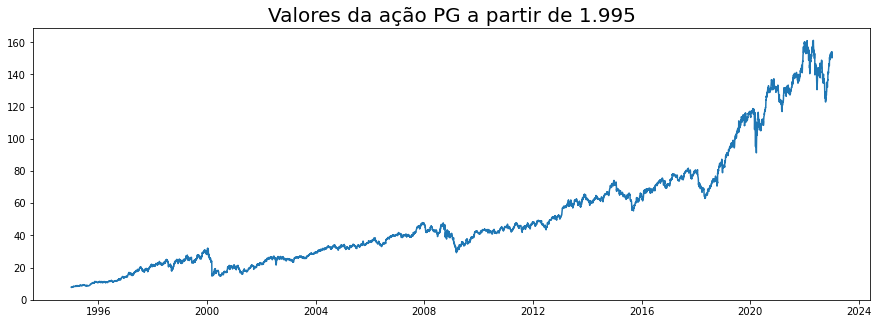

In [62]:
plt.figure(figsize=(15,5))
plt.plot(PG['Adj Close']);
plt.title("Valores da ação PG a partir de 1.995",fontsize = 20);
## O gráfico indica uma valorização no período de 2.000 a 2.013

## Taxa de retorno simples da ação PG a partir de 1.995

In [70]:
PG['simple_return']=(PG['Adj Close']/PG['Adj Close'].shift(1))-1

In [71]:
PG.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return
Date,,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.820024,3318400,NaN
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.757338,2218800,-0.008016
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.647637,2319600,-0.014142
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.663311,3438000,0.002050
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.631966,1795200,-0.004090


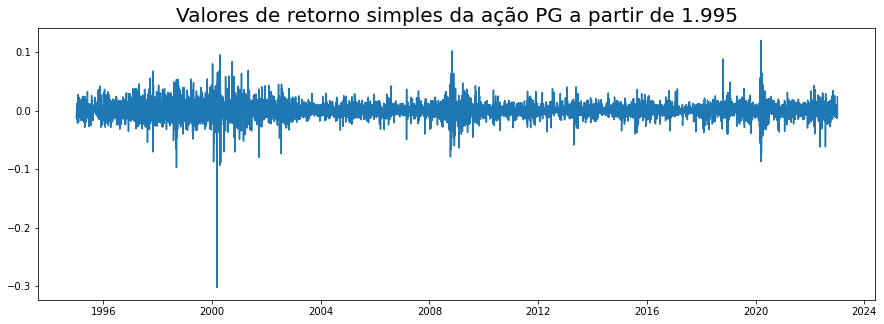

In [72]:
plt.figure(figsize=(15,5))
plt.plot(PG['simple_return']);
plt.title("Valores de retorno simples da ação PG a partir de 1.995",fontsize = 20);
## indeca a variação do valor da ação PG. O gráfico indica que a maior variação foi no ano de 2.000
## nos demais anos não ocorreu uma variação grande nos valor desta ação.

In [89]:
### Taxa média de retorno simples diária e Taxa média de retorno anual
taxa_media_diaria = PG['simple_return'].mean()
print(f"A taxa média de retorno simples diária: {np.round(taxa_media_diaria,5)*100} %")
taxa_media_anual = taxa_media_diaria*250
print("A taxa média de retorno simples anual: " + str(round(taxa_media_anual,5)*100) + "%")

A taxa média de retorno simples diária: 0.052 %
A taxa média de retorno anual: 13.064%


## Avaliação da taxa de retorno logarítmica da ação PG a partir de 1.995

In [88]:
PG['log_return'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
PG.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return,log_return
Date,,,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.820024,3318400,NaN,NaN
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.757338,2218800,-0.008016,-0.008048
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.647637,2319600,-0.014142,-0.014242
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.663311,3438000,0.002050,0.002047
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.631966,1795200,-0.004090,-0.004099


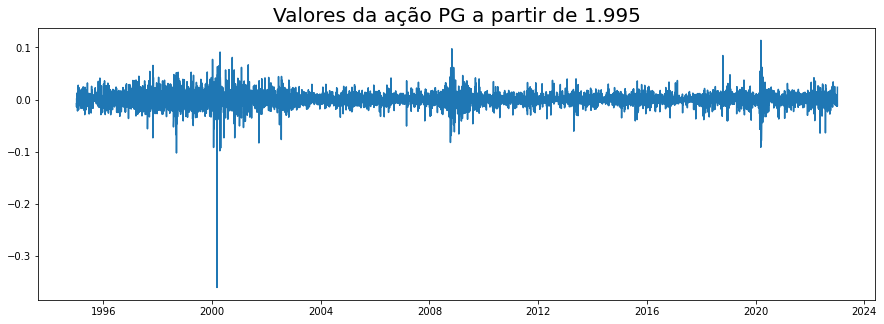

In [90]:
plt.figure(figsize=(15,5))
plt.plot(PG['log_return']);
plt.title("Valores da taxa logaritmíca da ação PG a partir de 1.995",fontsize = 20);

In [92]:
### Taxa média de retorno logaritmíca diária e Taxa média de retorno logaritmíca anual
taxa_media_diaria = PG['log_return'].mean()
print(f"A taxa média de retorno logaritmíca diária: {np.round(taxa_media_diaria,5)*100} %")
taxa_media_anual = taxa_media_diaria*250
print("A taxa média de retorno logaritmíca anual: " + str(round(taxa_media_anual,4)*100) + "%")

A taxa média de retorno logaritmíca diária: 0.042 %
A taxa média de retorno logaritmíca anual: 10.56%


## Análise de portfólio de tem as seguintes ações
## PG , MSFT, F e GE (siglas das ações - yahoo finance)

In [93]:
tickers = ['PG','MSFT','F','GE']
portfolio = pd.DataFrame()
for t in tickers:
  portfolio[t] = wb.get_data_yahoo(t,start = '1995-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [95]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7054 entries, 1995-01-03 to 2023-01-06
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7054 non-null   float64
 1   MSFT    7054 non-null   float64
 2   F       7054 non-null   float64
 3   GE      7054 non-null   float64
dtypes: float64(4)
memory usage: 275.5 KB


In [96]:
portfolio.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.820025,2.352808,4.220634,25.555323
1995-01-04,7.757339,2.369910,4.334195,25.555323
1995-01-05,7.647638,2.330820,4.296342,25.617947
1995-01-06,7.663310,2.369910,4.296342,25.492676
1995-01-09,7.631966,2.355252,4.372046,25.242125


In [97]:
portfolio.tail()

,PG,MSFT,F,GE
Date,,,,
2022-12-30,151.559998,239.820007,11.63,65.409836
2023-01-03,151.570007,239.580002,11.68,66.338799
2023-01-04,152.229996,229.100006,12.01,70.199997
2023-01-05,150.339996,222.309998,12.25,71.290001
2023-01-06,153.919998,224.929993,12.58,71.940002


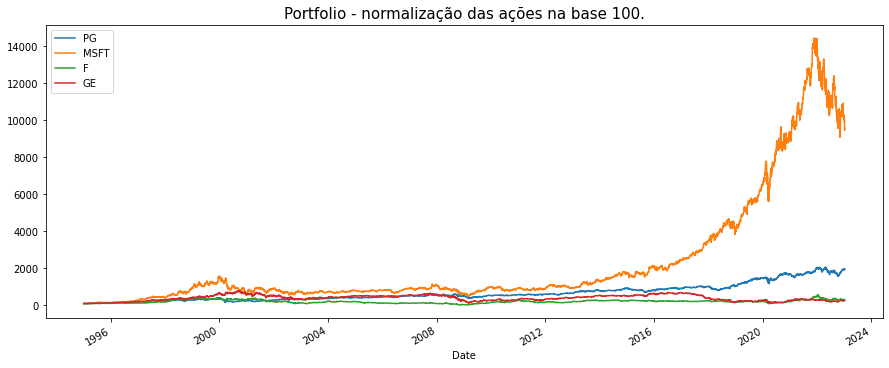

In [100]:
## Para comparar o desempenho das ações entre si é necessário normalizar os valores das ações.
## Vamos normalizar as ações na base 100
(portfolio/portfolio.iloc[0]*100).plot(figsize=(15,6));
plt.title('Portfolio - normalização das ações na base 100.',fontsize = 15);
### A empresa com maior desempenho foi Microsoft Company e a pior foi a Ford Company

In [104]:
### calculando o desempenho e o retorno de um portfólio
retorno = (portfolio/portfolio.shift(1)) - 1
retorno.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [120]:
## Portfólio_1, peso de cada ação sendo 0.25 (25%). A soma dos pesos iguais devem ser igual a 1.
peso_1 = [0.25,0.25,0.25,0.25]
retorno_anual = retorno.mean()*250
resultado_1 = np.dot(retorno_anual,peso_1)
## Portfólio_2, peso de cada ação sendo 0.40, 0.40, 0.15 e 0.05 respectivamente.
peso_2 = [0.40,0.40,0.15,0.05]
resultado_2 = np.dot(retorno_anual,peso_2)
print(f"O retorno anual do primeiro portfólio foi de {np.round(resultado_1*100,2)}" + " %")
print(f"O retorno anual do segundo portfólio foi de {np.round(resultado_2*100,2)}" + " %")
### O segundo portfólio deve maior retorno.

O retorno anual do primeiro portfólio foi de 13.75 %
O retorno anual do segundo portfólio foi de 15.91 %


## Avaliação dos índices das bolsas.
## GSPC, IXIC, GDAXI e FTSE (Siglas Finance Yahoo)

In [122]:
tickers = ['^GSPC','^IXIC','^GDAXI','^FTSE']
ind_data = pd.DataFrame()
for t in tickers:
  ind_data[t] = wb.get_data_yahoo(t,start = '1997-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [123]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000


In [124]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2022-12-30,3839.500000,10466.480469,13923.589844,7451.700195
2023-01-03,3824.139893,10386.980469,14181.669922,7554.100098
2023-01-04,3852.969971,10458.759766,14490.780273,7585.200195
2023-01-05,3808.100098,10305.240234,14436.309570,7633.500000
2023-01-06,3895.080078,10569.290039,14610.019531,7699.500000


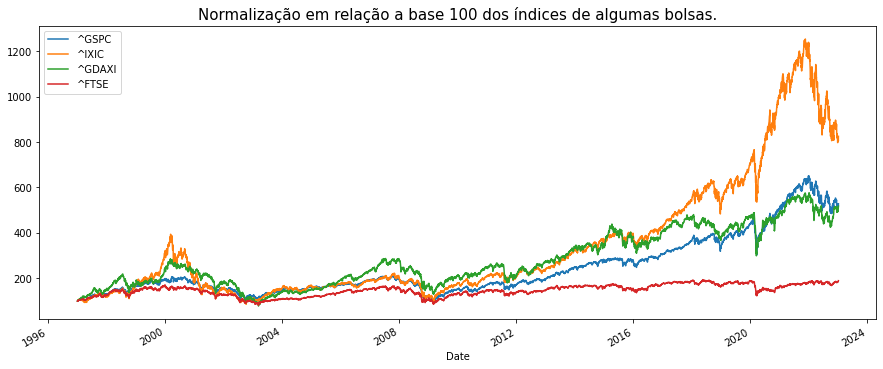

In [126]:
### Para realizar a comparação entre os índice é necessário normalizar 
### normalização dos índices relação a base 100
(ind_data/ind_data.iloc[0]*100).plot(figsize = (15,6))
plt.title("Normalização em relação a base 100 dos índices de algumas bolsas.",fontsize = 15);
plt.show();
## a bolsa com maior desempenho foi a Nasaq - ações da área de TI.